In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_samp = pd.read_csv('./data/reviews/reviews_01_2019.csv')
df_samp.head()

,listing_id,date
0,2515,2008-10-13
1,2515,2009-03-08
2,2515,2009-03-25
3,2515,2009-03-27
4,2515,2009-05-09


In [2]:
df_samp['date'] = pd.to_datetime(df_samp['date'], yearfirst=True)
df_samp['year'] = df_samp['date'].dt.year
df_samp['month'] = df_samp['date'].dt.month

df_samp2 = df_samp.groupby(['year','month','listing_id']).size().reset_index()
df_samp2.rename({0: 'count'}, axis=1, inplace=True)

df_samp2.head()

,year,month,listing_id,count
0,2008,10,2515,1
1,2009,3,2515,3
2,2009,3,5441,1
3,2009,4,5099,1
4,2009,4,5216,1


In [3]:
df_samp2['count'].unique()

array([ 1,  3,  2,  4,  7,  9,  5,  8,  6, 10, 11, 14, 13, 12, 15, 17, 19,
       16, 18, 24, 20, 21, 22, 23, 25], dtype=int64)

(array([3.17146e+05, 7.36970e+04, 2.93710e+04, 3.97900e+03, 1.40600e+03,
        6.57000e+02, 1.75000e+02, 1.08000e+02, 3.90000e+01, 1.30000e+01]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <a list of 10 Patch objects>)

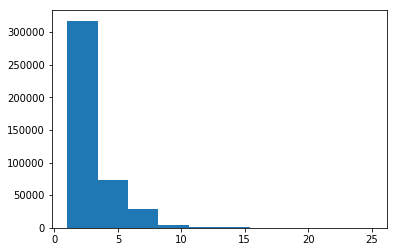

In [13]:
plt.hist(df_samp2['count'])

In [25]:
df_samp3 = df_samp2[(df_samp2.year == 2018) | (df_samp2.year == 2019)]

# df_samp3['monthly_availability'] = df_samp3['count']/30
# df_samp3 = df_samp3.groupby(['month','listing_id']).size().reset_index()

# df_samp3 = df_samp3.groupby(['month', 'listing_id'], as_index=False).mean().groupby('month')['monthly_availability'].mean().reset_index()
df_samp3 = df_samp3.groupby(['month', 'listing_id'], as_index=False).mean()
print(df_samp3[df_samp3['listing_id'] == 2595])

        month  listing_id    year  count
1           1        2595  2018.5    1.0
32635       4        2595  2018.0    1.0
44686       5        2595  2018.0    2.0
58548       6        2595  2018.0    2.0
101308      9        2595  2018.0    1.0
118343     10        2595  2018.0    3.0
135707     11        2595  2018.0    2.0
152175     12        2595  2018.0    2.0


In [29]:
skipList = {
    2015: {
        2: True,
        4: True,
        7: True
    },
    2016: {
        3: True
    },
    2019: {
        7: True,
        8: True,
        9: True,
        10: True,
        11: True,
        12: True
    },
}

reviews_df = pd.DataFrame({
    "date": [],
    "year": [],
    "month": [],
    "count": []
})

for yr in range(2015, 2020):
    for mo in range(1,13):
        if yr == 2019 and mo > 6:
            break
        elif yr in skipList and mo in skipList[yr]:
            # do nothing
            print('skipped')
        else:
            zeroStr = '0' if mo < 10 else ''
            df_rev = pd.read_csv('./data/reviews/reviews' + '_' + zeroStr + str(mo) + '_' + str(yr) + '.csv')
            
            dateObj = pd.to_datetime('1/'+str(mo)+'/'+str(yr), dayfirst=True)
    
            df_temp = pd.DataFrame({
                "date": [dateObj],
                "year": [dateObj.year],
                "month": [dateObj.month],
                "count": df_rev.shape[0]
            })
            
            reviews_df = reviews_df.append(df_temp)

reviews_df = reviews_df.set_index("date")

print(reviews_df.head())
print(reviews_df.shape)

skipped
skipped
skipped
skipped
              year  month     count
date                               
2015-01-01  2015.0    1.0  277659.0
2015-03-01  2015.0    3.0  280557.0
2015-05-01  2015.0    5.0  298181.0
2015-06-01  2015.0    6.0  316825.0
2015-08-01  2015.0    8.0  352328.0
(50, 3)


In [30]:
sns.set(rc={'figure.figsize': (11,4)})

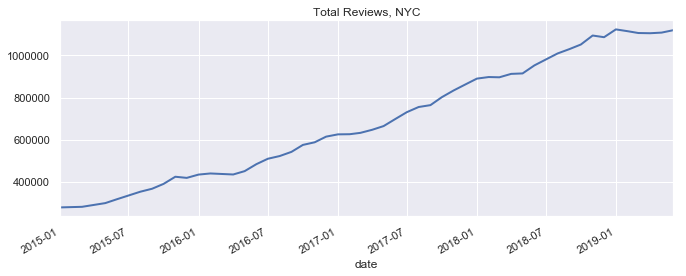

In [31]:
reviews_df['count'].plot(linewidth=2);
plt.title("Total Reviews, NYC")
plt.savefig("total_reviews_time.png")